# The Battle of Neighborhoods [Singapore]

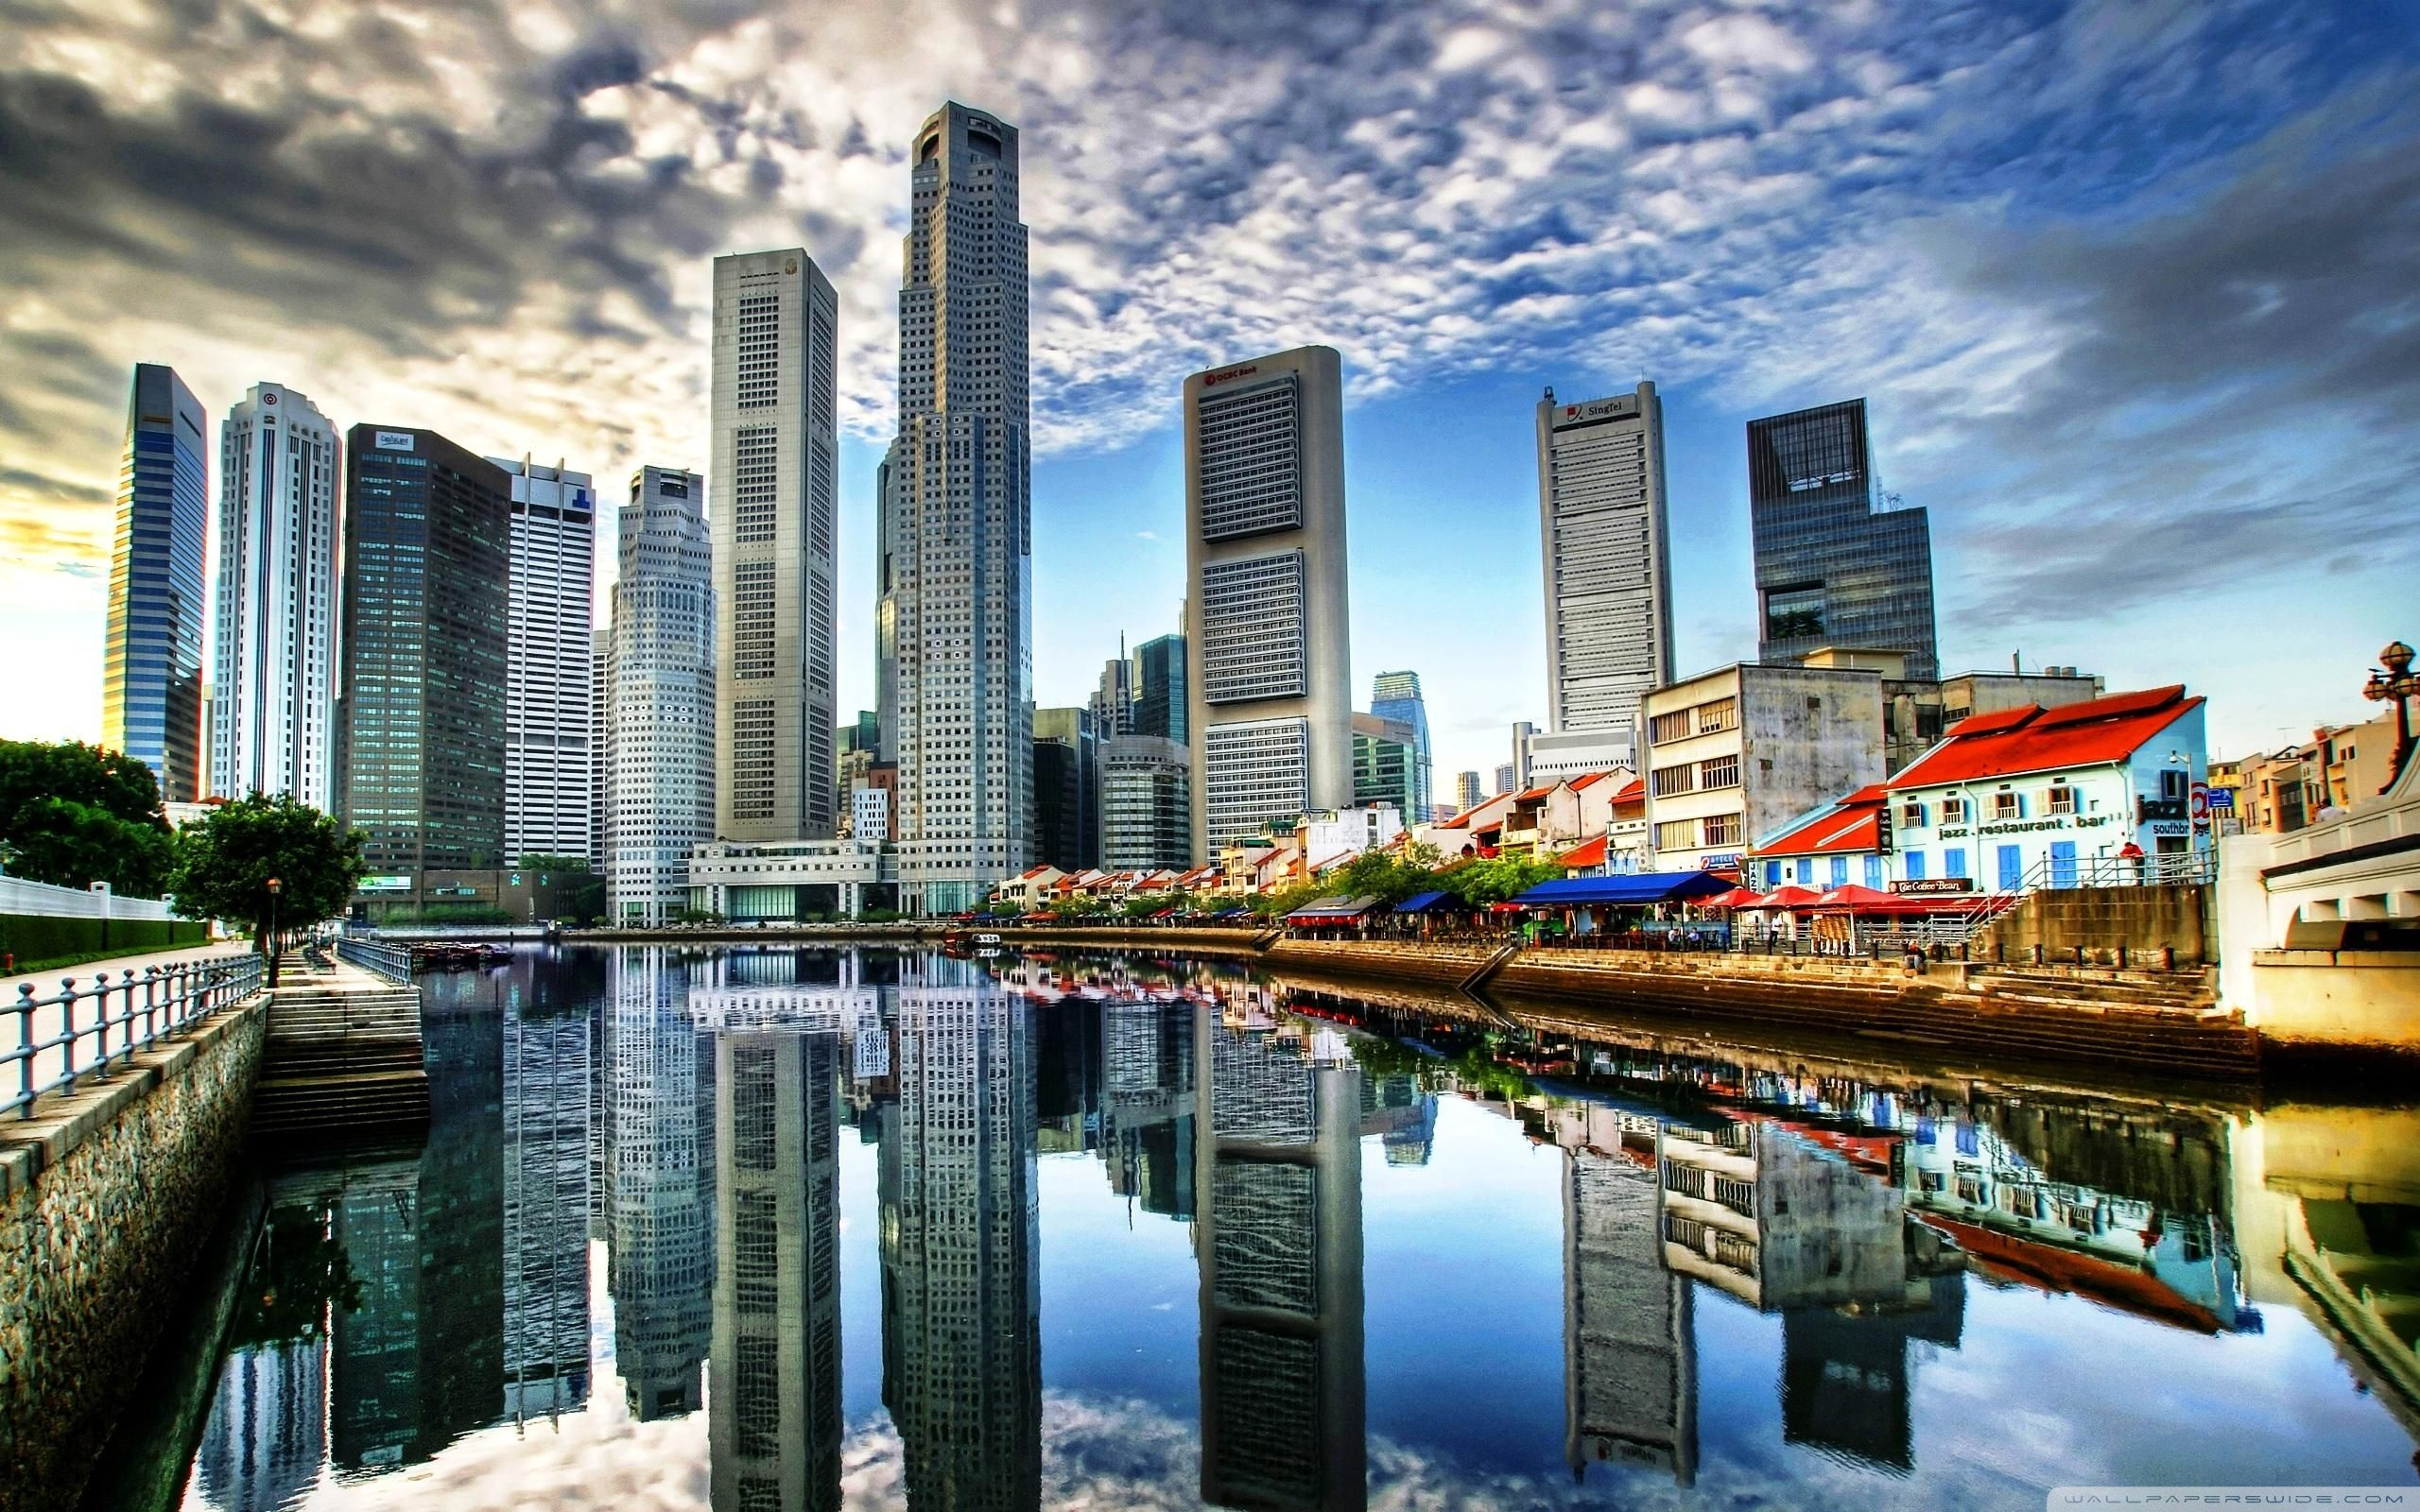


## Introduction

Singapore, as a sovereign island city-state in South-East Asia, is an important trading and business hub in the region that attacts thousands of foreign visitors every year for business, work, study and play. For this, it becomes a melting pot of different cultures from the people that visit and work here. In this project, we will try to explore and list the different types of restaurants that serve international cuisines in Singapore.

## Business questions to be answered in this project.
### 1.	To find out the Thai and Korean restaurants in Singapore
### 2.	The best rated Thai and Korean restaurant in Singapore to recommend for a Korean or a Thai visiting Singapore.
### 3.	If a businessman is interested to open a Thai or a Korean restaurant in Singapore, which part of Singapore will be the best place to attract diners?
### 4.	What type of venues are the most popular in the neighbourhoods of Singapore?


## Data

For this project, we will be using the following data.
1. List of neighborhoods in Singapore with location coordinates (latitudes and longitudes).
2. List of nearby venues in these neighborhoods from FourSquare API.

## Methodology

1. First, we will download the planning areas and subzones data from Open Data Singapore link.
2. We will process the csv data into a Pandas dataframe and remove the unnecessary columns not required in our analysis.
3. We will call Nominatim inside Geopy library to retrieve the location coordinates of the neighborhoods.
4. We will find all available venues for each neighborhood using FourSquare API.
5. We will then filter out the Korean and Thai restaurant venues.
6. With FourSquare API, we will retrieve the ratings, tips and likes count for the Korean and Thai restaurants.
7. We will go back to the neighborhoods and sort the dataframe by population count and find out which location is best to open a Korean or Thai restaurant to capture the customers.
8. We will go back to the retrieved venues for each neighborhood and do a pivot table to see what are the most popular venue in each neighborhood.

Importing the required libraries.

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

import bs4 as bs
import lxml.html as lh

print('Libraries imported.')

Libraries imported.


After some exploration of the correct data to use for getting the accurate snapshot of the neighborhoods of Singapore, we found the subzones to be more relevant for our analysis. The information of the subzones can be found from the following link [https://data.gov.sg/dataset/resident-population-by-planning-area-subzone-and-type-of-dwelling-2015]. The data is in csv format which is downloaded for analysis.

In [2]:
df = pd.read_csv('resident-population-by-subzone-and-type-of-dwelling.csv')

In [3]:
df.head()

year level_1     level_2                 level_3  value
0  2015   Total  Ang Mo Kio  Ang Mo Kio Town Centre   5020
1  2015   Total  Ang Mo Kio               Cheng San  29770
2  2015   Total  Ang Mo Kio              Chong Boon  27900
3  2015   Total  Ang Mo Kio             Kebun Bahru  23910
4  2015   Total  Ang Mo Kio         Sembawang Hills   6890

### Data Cleaning and manipulation 

The raw data from the csv will require some cleaning and renaming of columns into meaningful names. 
We also drop some columns that are not required in our analysis.

In [4]:
df.rename(columns={'level_2':'Area','level_3':'Neighborhood' ,'value': 'Population'}, inplace = True)

In [5]:
df.head()

year level_1        Area            Neighborhood  Population
0  2015   Total  Ang Mo Kio  Ang Mo Kio Town Centre        5020
1  2015   Total  Ang Mo Kio               Cheng San       29770
2  2015   Total  Ang Mo Kio              Chong Boon       27900
3  2015   Total  Ang Mo Kio             Kebun Bahru       23910
4  2015   Total  Ang Mo Kio         Sembawang Hills        6890

In [6]:
df = df.drop(['year','level_1'], axis = 1)

In [7]:
df = df.drop_duplicates(subset = ['Neighborhood'])
df.head(10)

Area            Neighborhood  Population
0  Ang Mo Kio  Ang Mo Kio Town Centre        5020
1  Ang Mo Kio               Cheng San       29770
2  Ang Mo Kio              Chong Boon       27900
3  Ang Mo Kio             Kebun Bahru       23910
4  Ang Mo Kio         Sembawang Hills        6890
5  Ang Mo Kio              Shangri-La       18510
6  Ang Mo Kio                  Tagore        8350
7  Ang Mo Kio              Townsville       23770
8  Ang Mo Kio            Yio Chu Kang          30
9  Ang Mo Kio       Yio Chu Kang East        4080

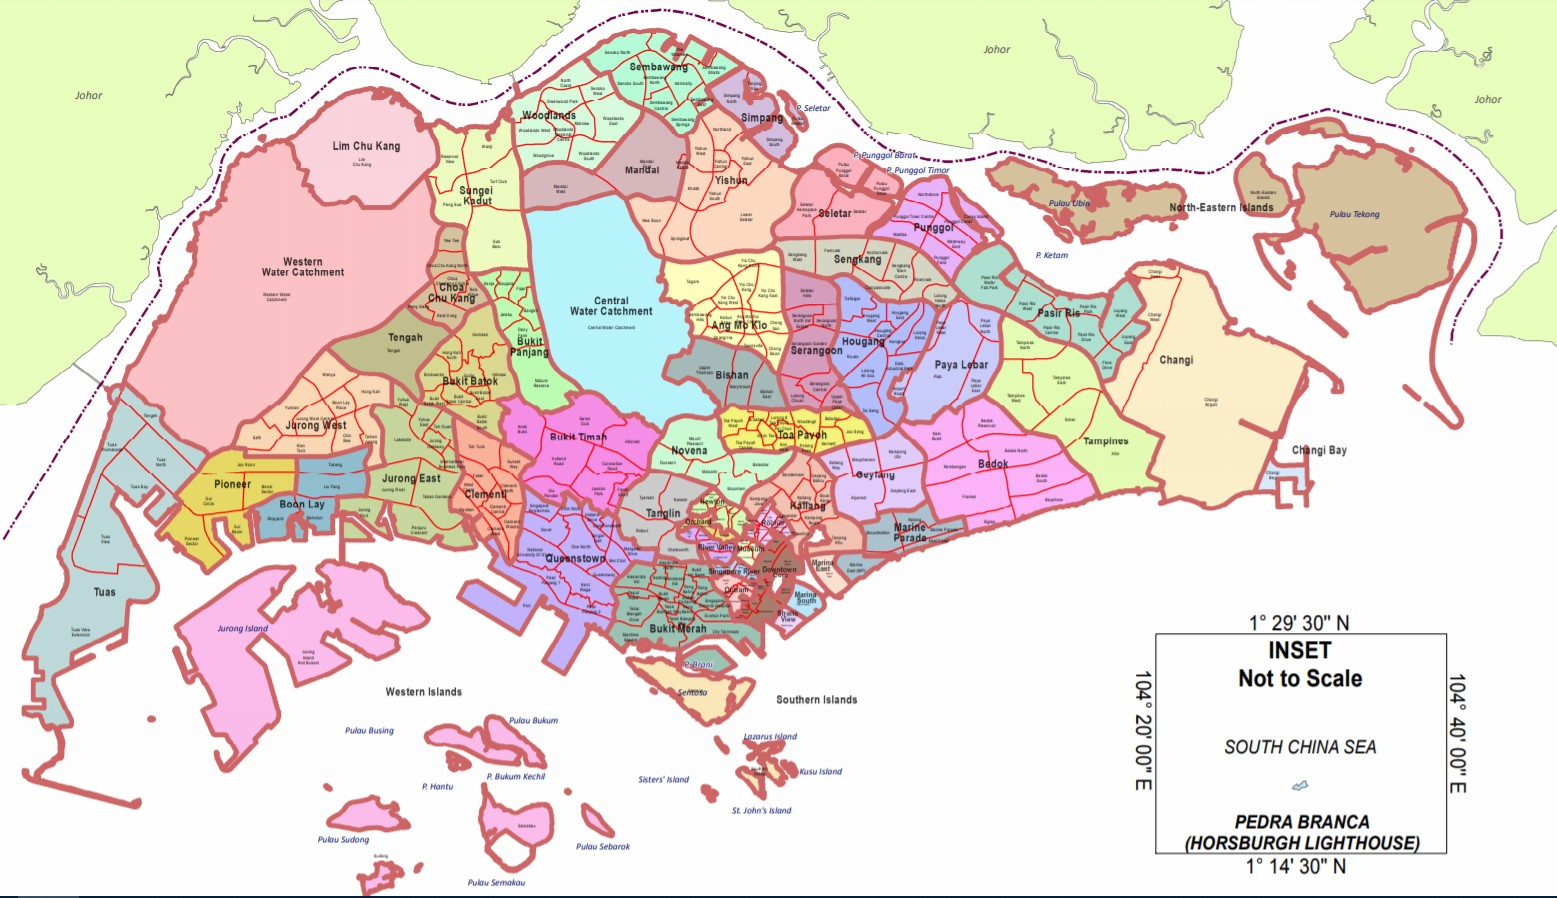

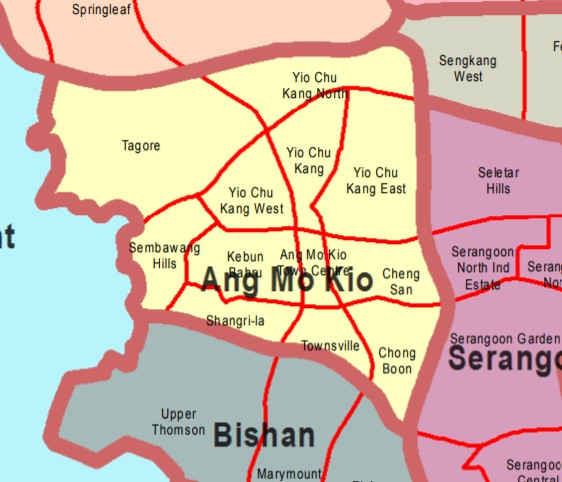

From the above pictures captured from the Internet, we can see that the Area comprises of a number of smaller subzones which for this case, we will use as the neighborhoods.

There is no location coordinates (Latitude and Longitude) for the neighborhoods. We will need to do some more manipulation and call Geopy library to get the required information.

In [8]:
neigh = df['Neighborhood'].tolist()

In [9]:
lat = []
lon = []
for x in range(len(neigh)):
    try:
        address = neigh[x] + ', Singapore'
        geolocator = Nominatim(user_agent = "sg_explorer")
        location = geolocator.geocode(address)
        lat.append(location.latitude)
        lon.append(location.longitude)
    except:
        lat.append('0')
        lon.append('0')
print(lat)
print(lon)

[1.3712845, 1.3408630000000001, 1.36820695, 1.4602144, 1.3723986, 1.3112474, 1.3841414, 1.3593241, 1.3817905, 1.3817905, 1.3817905, 1.3128118, 1.3324018, 1.3425058, 1.3171206, 1.3146796, 1.3360277, 1.3210321, 1.3169991, 1.3509859, 1.34860435, 1.354498, '0', 1.302728, 1.3253215, 1.3512849, 1.3490572, 1.3490572, 1.3455305, 1.3588929, 1.3539591999999998, 1.3624042, 1.3553973, 1.277477, 1.277477, 1.2879953, 1.2704395, 1.2476261499999999, 1.2815679, 1.2771286000000002, 1.28115755, '0', 1.264222, 1.2896482, 1.27944885, 1.2725019, 1.2752381, 1.2785818, 1.28617925, 1.28617925, 1.3800554, 1.3651581, 1.3845503, 1.3782544, 1.3463969, 1.3826651, 1.3826778, 1.3358173, 1.3234152, 1.31259105, 1.2904753, 1.3126042, 1.3158886, 1.3429964, 1.3080256, 1.3757082999999999, 1.35107955, 1.35107955, 1.3823894, 1.3892601, 1.3786034, '0', 1.3766705, 1.3974608, 1.3151003, 1.3151003, 1.3151003, 1.29980405, 1.2719239999999998, 1.3080256, 1.3219194, 1.3309244, 1.3033734, 1.276629, 1.2999532999999999, 1.276564, '0', 

In [10]:
df.insert(1,"Latitude", None)
df.insert(2,"Longitude", None)
df.head()

Area Latitude Longitude            Neighborhood  Population
0  Ang Mo Kio     None      None  Ang Mo Kio Town Centre        5020
1  Ang Mo Kio     None      None               Cheng San       29770
2  Ang Mo Kio     None      None              Chong Boon       27900
3  Ang Mo Kio     None      None             Kebun Bahru       23910
4  Ang Mo Kio     None      None         Sembawang Hills        6890

In [11]:
df['Latitude']= lat
df['Longitude'] = lon
df.head()

Area Latitude Longitude            Neighborhood  Population
0  Ang Mo Kio  1.37128   103.847  Ang Mo Kio Town Centre        5020
1  Ang Mo Kio  1.34086    103.83               Cheng San       29770
2  Ang Mo Kio  1.36821   103.856              Chong Boon       27900
3  Ang Mo Kio  1.46021   103.777             Kebun Bahru       23910
4  Ang Mo Kio   1.3724   103.829         Sembawang Hills        6890

In [12]:
df['Latitude'] = df['Latitude'].astype('float64')
df['Longitude'] = df['Longitude'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 280
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          281 non-null    object 
 1   Latitude      281 non-null    float64
 2   Longitude     281 non-null    float64
 3   Neighborhood  281 non-null    object 
 4   Population    281 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 13.2+ KB


In [13]:
df2 = df[(df['Latitude'] != 0) | (df['Longitude'] != 0)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 280
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          270 non-null    object 
 1   Latitude      270 non-null    float64
 2   Longitude     270 non-null    float64
 3   Neighborhood  270 non-null    object 
 4   Population    270 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 12.7+ KB


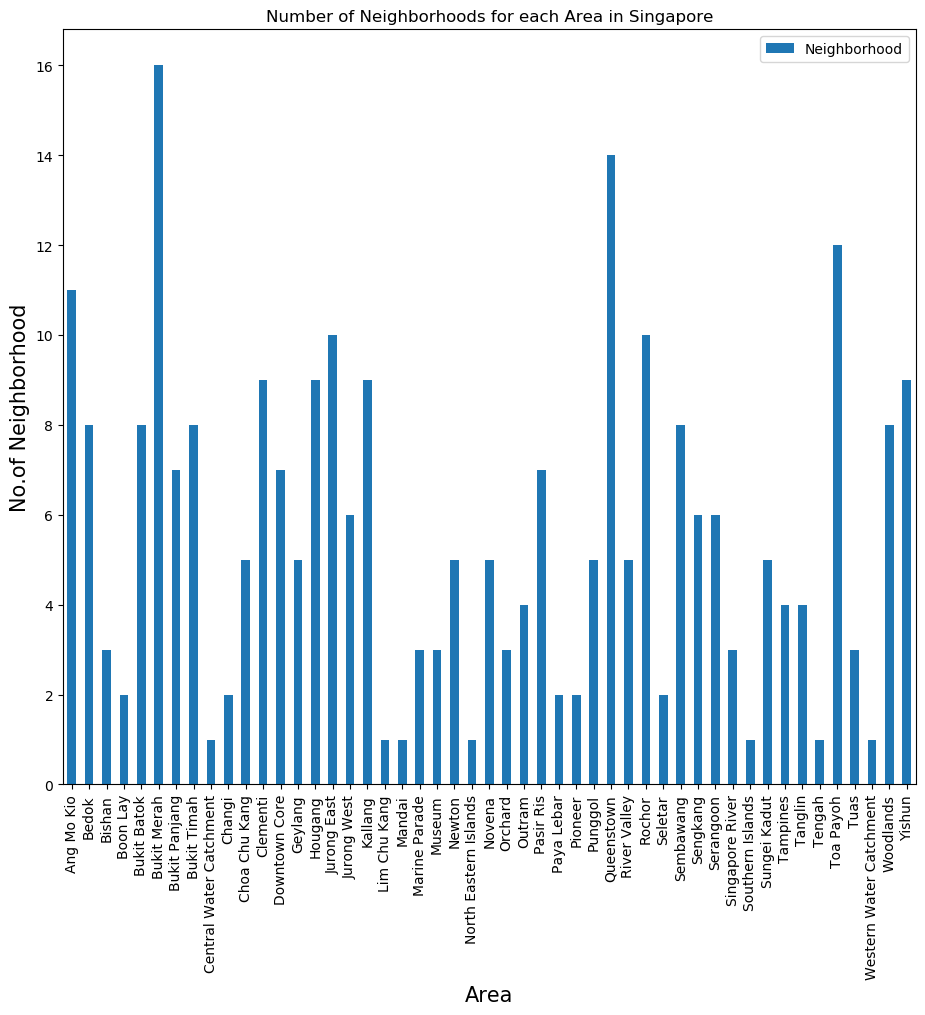

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (11,10), dpi = 100)
# title
plt.title('Number of Neighborhoods for each Area in Singapore')
#On x-axis
plt.xlabel('Area', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize = 15)
#giving a bar plot
df2.groupby('Area')['Neighborhood'].count().plot(kind = 'bar')
#legend
plt.legend()
#displays the plot
plt.show()

With the location coordinates obtained from Geopy library, we can create a map visualization to view the neighborhoods of Singapore.

In [15]:
address = 'Singapore'

geolocator = Nominatim(user_agent = "sg_explorer")
location = geolocator.geocode(address, timeout = 10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.3408630000000001, 103.83039182212079.


In [16]:
map_Sg = folium.Map(location = [latitude, longitude], zoom_start = 11)

for lat, lng, neighborhood, area in zip(df2['Latitude'], df2['Longitude'], 
                                          df2['Neighborhood'], df2['Area']):
    label = '{},{}'.format(area, neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.6,
        parse_html = False).add_to(map_Sg)  
    
map_Sg

### Getting the venues from Foursquare API

Next we shall use Foursquare API to query the venues in these neighborhoods.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius = 1000):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
            

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            1000)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 'Venue ID',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
sg_venues = getNearbyVenues(names = df2['Neighborhood'], latitudes = df2['Latitude'],
                            longitudes = df2['Longitude'])
sg_venues.shape

(16427, 8)

In [20]:
sg_venues.head(15)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Ang Mo Kio Town Centre               1.371285              103.846994   
1   Ang Mo Kio Town Centre               1.371285              103.846994   
2   Ang Mo Kio Town Centre               1.371285              103.846994   
3   Ang Mo Kio Town Centre               1.371285              103.846994   
4   Ang Mo Kio Town Centre               1.371285              103.846994   
5   Ang Mo Kio Town Centre               1.371285              103.846994   
6   Ang Mo Kio Town Centre               1.371285              103.846994   
7   Ang Mo Kio Town Centre               1.371285              103.846994   
8   Ang Mo Kio Town Centre               1.371285              103.846994   
9   Ang Mo Kio Town Centre               1.371285              103.846994   
10  Ang Mo Kio Town Centre               1.371285              103.846994   
11  Ang Mo Kio Town Centre               1.371285              103.846994   
12  Ang Mo Kio Town Centre               1.371285              103.846994   
13  Ang Mo Kio Town Centre               1.371285              103.846994   
14  Ang Mo Kio Town Centre               1.371285              103.846994   

                                Venue                  Venue ID  \
0      Face Ban Mian 非板面 (Ang Mo Kio)  50712b67e4b0548504446dea   
1                       Old Chang Kee  4bc30123abf495215220c393   
2                      FairPrice Xtra  4b15f661f964a52012b623e3   
3                      NTUC FairPrice  4ece4dd693ad987b4a9fb4ef   
4                          MOS Burger  4b1ea04ff964a520e21c24e3   
5           Kam Jia Zhuang Restaurant  4b9f647df964a520032037e3   
6                               PLAYe  4b5eef6df964a5208b9e29e3   
7             Collin's Grille . Bento  57662f0f498e7856b64833be   
8                                 A&W  5d48d8dfdae4eb0008d85e5a   
9   Xi Xiang Feng Yong Tau Foo 喜相逢酿豆腐  4b0a18e6f964a520c02123e3   
10                       True Fitness  51f77455498e868c8f2bbbbb   
11               e品红麻辣香锅 Mala Hot Pot  53c68f51498efd710da56841   
12              Dog Run @ Bishan Park  4d5cc196775f8cfae9f2b9e0   
13                          Swensen's  5213643e11d236c03cd2810f   
14                       Pepper Lunch  4b06a9c8f964a52059ee22e3   

    Venue Latitude  Venue Longitude              Venue Category  
0         1.372031       103.847504                Noodle House  
1         1.369094       103.848389                 Snack Place  
2         1.369279       103.848886                 Supermarket  
3         1.371507       103.847082                 Supermarket  
4         1.369170       103.847831                Burger Joint  
5         1.368167       103.844118            Asian Restaurant  
6         1.369109       103.848225                  Hobby Shop  
7         1.371713       103.847526  Modern European Restaurant  
8         1.369541       103.849043        Fast Food Restaurant  
9         1.371975       103.846408          Chinese Restaurant  
10        1.372891       103.847661                         Gym  
11        1.371498       103.847803            Asian Restaurant  
12        1.365967       103.844024                     Dog Run  
13        1.369112       103.847718                Dessert Shop  
14        1.369107       103.847791         Japanese Restaurant

In [22]:
print('There are {} uniques categories.'.format(len(sg_venues['Venue Category'].unique())))

There are 382 uniques categories.


In [23]:
sg_venues_clean = sg_venues.drop_duplicates(subset='Venue ID', keep="first")

In [24]:
sg_venues_clean.shape

(6276, 8)

In [25]:
sg_venues_clean.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                 
Admiralty                                       28                      28   
Alexandra Hill                                  84                      84   
Aljunied                                       100                     100   
Anak Bukit                                      75                      75   
Anchorvale                                      22                      22   
Ang Mo Kio Town Centre                          81                      81   
Anson                                           49                      49   
Balestier                                       54                      54   
Bangkit                                         40                      40   
Bayshore                                        45                      45   
Bedok North                                     41                      41   
Bedok Reservoir                                 13                      13   
Bedok South                                      8                       8   
Bencoolen                                        2                       2   
Bendemeer                                       47                      47   
Bidadari                                        22                      22   
Bishan East                                     67                      67   
Boat Quay                                        2                       2   
Boon Keng                                       39                      39   
Boon Lay Place                                  16                      16   
Boon Teck                                       22                      22   
Boulevard                                        1                       1   
Braddell                                        65                      65   
Bras Basah                                      19                      19   
Bugis                                           85                      85   
Bukit Batok Central                             52                      52   
Bukit Batok East                                11                      11   
Bukit Batok West                                26                      26   
Bukit Ho Swee                                  100                     100   
Bukit Merah                                     54                      54   
Cairnhill                                       45                      45   
Central Water Catchment                          3                       3   
Changi Point                                    32                      32   
Chatsworth                                      13                      13   
Cheng San                                       19                      19   
China Square                                    15                      15   
Chinatown                                        2                       2   
Choa Chu Kang Central                           48                      48   
Choa Chu Kang North                             21                      21   
Chong Boon                                      31                      31   
City Hall                                       17                      17   
City Terminals                                   4                       4   
Clarke Quay                                      1                       1   
Clementi Central                                92                      92   
Clementi Woods                                  64                      64   
Commonwealth                                    32                      32   
Compassvale                                     25                      25   
Coronation Road                                 51                      51   
Crawford                                        31                      31   
Dairy Farm                                      10 

### Analyze the venue categories in each neighborhood

After calling FourSquare API to get the nearby venues in each neighborhood, we can further analyze the data to find out in more details, what are the most popular venues in each neighborhood and also to explore whether there is any similarities or difference in the venue categories in each neighborhood. 

First, we get a new dataframe to store the venue category from the sg_venues_clean dataframe. We then encode a value to each occurrence of the venue found.

In [26]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues_clean[['Venue Category']], prefix="", prefix_sep = "")

# add neighborhood column back to dataframe
sg_onehot['Neighborhood'] = sg_venues_clean['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head()

Zoo Exhibit  ATM  Accessories Store  Airport  Airport Lounge  \
0            0    0                  0        0               0   
1            0    0                  0        0               0   
2            0    0                  0        0               0   
3            0    0                  0        0               0   
4            0    0                  0        0               0   

   Airport Service  Airport Terminal  American Restaurant  Aquarium  Arcade  \
0                0                 0                    0         0       0   
1                0                 0                    0         0       0   
2                0                 0                    0         0       0   
3                0                 0                    0         0       0   
4                0                 0                    0         0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Arts & Entertainment  \
0            0           0                    0                     0   
1            0           0                    0                     0   
2            0           0                    0                     0   
3            0           0                    0                     0   
4            0           0                    0                     0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  Auto Garage  \
0                 0                   0                      0            0   
1                 0                   0                      0            0   
2                 0                   0                      0            0   
3                 0                   0                      0            0   
4                 0                   0                      0            0   

   BBQ Joint  Baby Store  Badminton Court  Bagel Shop  Bakery  Bank  Bar  \
0          0           0                0           0       0     0    0   
1          0           0                0           0       0     0    0   
2          0           0                0           0       0     0    0   
3          0           0                0           0       0     0    0   
4          0           0                0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Bay  Beach  Beach Bar  \
0               0                 0                 0    0      0          0   
1               0                 0                 0    0      0          0   
2               0                 0                 0    0      0          0   
3               0                 0                 0    0      0          0   
4               0                 0                 0    0      0          0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0                0         0            0           0                   0   
1                0         0            0           0                   0   
2                0         0            0           0                   0   
3                0         0            0           0                   0   
4                0         0            0           0                   0   

   Betting Shop  Big Box Store  Bike Rental / Bike Share  Bike Trail  Bistro  \
0             0              0                         0           0       0   
1             0              0                         0           0       0   
2             0              0                         0           0       0   
3             0              0                         0           0       0   
4             0              0                         0           0       0   

   Board Shop  Boarding House  Boat or Ferry  Bookstore  Border Crossing  \
0           0               0              0          0                0   
1           0               0              0          0                0   
2           0               0              0          0                0   
3           0            

In [27]:
sg_onehot.shape

(6276, 382)

In [28]:
sg_group = sg_onehot.groupby('Neighborhood').mean().reset_index()
sg_group

Neighborhood  Zoo Exhibit       ATM  Accessories Store  \
0                      Admiralty     0.000000  0.000000           0.000000   
1                 Alexandra Hill     0.000000  0.000000           0.000000   
2                       Aljunied     0.000000  0.000000           0.000000   
3                     Anak Bukit     0.000000  0.000000           0.000000   
4                     Anchorvale     0.000000  0.000000           0.000000   
5         Ang Mo Kio Town Centre     0.000000  0.000000           0.000000   
6                          Anson     0.000000  0.000000           0.000000   
7                      Balestier     0.000000  0.000000           0.000000   
8                        Bangkit     0.000000  0.000000           0.000000   
9                       Bayshore     0.000000  0.000000           0.000000   
10                   Bedok North     0.000000  0.000000           0.000000   
11               Bedok Reservoir     0.000000  0.000000           0.000000   
12                   Bedok South     0.000000  0.000000           0.000000   
13                     Bencoolen     0.000000  0.000000           0.000000   
14                     Bendemeer     0.000000  0.000000           0.000000   
15                      Bidadari     0.000000  0.000000           0.000000   
16                   Bishan East     0.000000  0.000000           0.000000   
17                     Boat Quay     0.000000  0.000000           0.000000   
18                     Boon Keng     0.000000  0.000000           0.000000   
19                Boon Lay Place     0.000000  0.000000           0.000000   
20                     Boon Teck     0.000000  0.000000           0.000000   
21                     Boulevard     0.000000  0.000000           0.000000   
22                      Braddell     0.000000  0.000000           0.000000   
23                    Bras Basah     0.000000  0.000000           0.000000   
24                         Bugis     0.000000  0.000000           0.000000   
25           Bukit Batok Central     0.000000  0.000000           0.000000   
26              Bukit Batok East     0.000000  0.000000           0.000000   
27              Bukit Batok West     0.000000  0.000000           0.000000   
28                 Bukit Ho Swee     0.000000  0.000000           0.000000   
29                   Bukit Merah     0.000000  0.000000           0.000000   
30                     Cairnhill     0.000000  0.000000           0.000000   
31       Central Water Catchment     0.000000  0.000000           0.000000   
32                  Changi Point     0.000000  0.000000           0.000000   
33                    Chatsworth     0.000000  0.000000           0.000000   
34                     Cheng San     0.000000  0.000000           0.000000   
35                  China Square     0.000000  0.000000           0.000000   
36                     Chinatown     0.000000  0.000000           0.000000   
37         Choa Chu Kang Central     0.000000  0.000000           0.000000   
38           Choa Chu Kang North     0.000000  0.000000           0.000000   
39                    Chong Boon     0.000000  0.000000           0.000000   
40                     City Hall     0.000000  0.000000           0.000000   
41                City Terminals     0.000000  0.000000           0.000000   
42                   Clarke Quay     0.000000  0.000000           0.000000   
43              Clementi Central     0.000000  0.000000           0.000000   
44                Clementi Woods     0.000000  0.000000           0.000000   
45                  Commonwealth     0.000000  0.000000           0.000000   
46                   Compassvale     0.000000  0.000000           0.000000   
47               Coronation Road     0.000000  0.000000           0.000000   
48                      Crawford     0.000000  0.000000           0.000000   
49                    Dairy Farm     0.000000  0.000000           0.000000   
50          Defu Industrial Park     0.000

In [29]:
sg_group.shape

(225, 382)

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sg_venues_sorted = pd.DataFrame(columns = columns)
sg_venues_sorted['Neighborhood'] = sg_group['Neighborhood']

for ind in np.arange(sg_group.shape[0]):
    sg_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_group.iloc[ind, :], num_top_venues)

sg_venues_sorted

Neighborhood   1st Most Common Venue  \
0                      Admiralty             Bus Station   
1                 Alexandra Hill      Chinese Restaurant   
2                       Aljunied      Chinese Restaurant   
3                     Anak Bukit       Korean Restaurant   
4                     Anchorvale              Food Court   
5         Ang Mo Kio Town Centre              Food Court   
6                          Anson             Coffee Shop   
7                      Balestier      Chinese Restaurant   
8                        Bangkit    Fast Food Restaurant   
9                       Bayshore      Chinese Restaurant   
10                   Bedok North              Food Court   
11               Bedok Reservoir                Bus Line   
12                   Bedok South              Food Court   
13                     Bencoolen       French Restaurant   
14                     Bendemeer      Chinese Restaurant   
15                      Bidadari       Convenience Store   
16                   Bishan East              Food Court   
17                     Boat Quay               Speakeasy   
18                     Boon Keng      Chinese Restaurant   
19                Boon Lay Place              Food Court   
20                     Boon Teck      Chinese Restaurant   
21                     Boulevard            Noodle House   
22                      Braddell            Noodle House   
23                    Bras Basah                   Hotel   
24                         Bugis                   Hotel   
25           Bukit Batok Central             Coffee Shop   
26              Bukit Batok East              Food Court   
27              Bukit Batok West              Food Court   
28                 Bukit Ho Swee      Chinese Restaurant   
29                   Bukit Merah          Clothing Store   
30                     Cairnhill                Boutique   
31       Central Water Catchment               Reservoir   
32                  Changi Point                 Airport   
33                    Chatsworth             Bus Station   
34                     Cheng San             Flower Shop   
35                  China Square       French Restaurant   
36                     Chinatown              Food Court   
37         Choa Chu Kang Central             Coffee Shop   
38           Choa Chu Kang North                     Gym   
39                    Chong Boon              Food Court   
40                     City Hall                   Hotel   
41                City Terminals           Boat or Ferry   
42                   Clarke Quay                  Hostel   
43              Clementi Central              Food Court   
44                Clementi Woods                   Beach   
45                  Commonwealth                    Café   
46                   Compassvale             Coffee Shop   
47               Coronation Road                  Bakery   
48                      Crawford         Thai Restaurant   
49                    Dairy Farm                   Trail   
50          Defu Industrial Park             Coffee Shop   
51                    Depot Road              Food Court   
52                   Dhoby Ghaut     Japanese Restaurant   
53                         Dover                    Café   
54                       Dunearn                    Café   
55                  Everton Park     Japanese Restaurant   
56                         Faber                  Office   
57                         Fajar     Martial Arts School   
58                  Farrer Court       Indian Restaurant   
59                      Fernvale        Asian Restaurant   
60                   Flora Drive             Bus Station   
61                  Fort Canning                   Hotel   
62                       Frankel       Indian Restaurant   
63                     Gali Batu             Bus Station   
64                 Geylang Bahru             Coffee Shop   
65                  Geylang East        Asian Restaurant   


In [34]:
# set number of clusters
kclusters = 5

sg_group_clustering = sg_group.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(sg_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:224] 

array([2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 1,
       2, 4, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 4,
       4, 4, 4, 0, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 4, 0, 4, 2, 4, 3, 4, 2, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 2, 2, 4, 3, 4, 4, 0, 4, 2, 2, 4, 3, 4, 4, 2, 4, 4, 0, 4,
       4, 4, 4, 2, 2, 4, 0, 3, 4, 4, 4, 4, 2, 4, 4, 2, 4, 0, 0, 2, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 2, 2, 4, 4, 2, 4, 2, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 3, 4,
       4, 2, 2, 4])

In [35]:
sg_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sg_merged = df2
sg_merged = sg_merged.join(sg_venues_sorted.set_index('Neighborhood'), on ='Neighborhood')

In [36]:
sg_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 280
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    270 non-null    object 
 1   Latitude                270 non-null    float64
 2   Longitude               270 non-null    float64
 3   Neighborhood            270 non-null    object 
 4   Population              270 non-null    int64  
 5   Cluster Labels          225 non-null    float64
 6   1st Most Common Venue   225 non-null    object 
 7   2nd Most Common Venue   225 non-null    object 
 8   3rd Most Common Venue   225 non-null    object 
 9   4th Most Common Venue   225 non-null    object 
 10  5th Most Common Venue   225 non-null    object 
 11  6th Most Common Venue   225 non-null    object 
 12  7th Most Common Venue   225 non-null    object 
 13  8th Most Common Venue   225 non-null    object 
 14  9th Most Common Venue   225 non-null    ob

In [37]:
sg_merged1 = sg_merged.dropna()

In [38]:
sg_merged1['Cluster Labels'] = sg_merged1['Cluster Labels'].astype('int64')

C:\Users\etentan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
sg_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 277
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    225 non-null    object 
 1   Latitude                225 non-null    float64
 2   Longitude               225 non-null    float64
 3   Neighborhood            225 non-null    object 
 4   Population              225 non-null    int64  
 5   Cluster Labels          225 non-null    int64  
 6   1st Most Common Venue   225 non-null    object 
 7   2nd Most Common Venue   225 non-null    object 
 8   3rd Most Common Venue   225 non-null    object 
 9   4th Most Common Venue   225 non-null    object 
 10  5th Most Common Venue   225 non-null    object 
 11  6th Most Common Venue   225 non-null    object 
 12  7th Most Common Venue   225 non-null    object 
 13  8th Most Common Venue   225 non-null    object 
 14  9th Most Common Venue   225 non-null    ob

In [40]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(sg_merged1['Latitude'], sg_merged1['Longitude'], 
                                  sg_merged1['Neighborhood'], sg_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [41]:
sg_merged1.loc[sg_merged1['Cluster Labels'] == 0, 
                     sg_merged1.columns[[1] + list(range(5, sg_merged1.shape[1]))]]

Latitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
56   1.382678               0      Asian Restaurant           Bus Station   
159  1.375368               0           Bus Station    Seafood Restaurant   
219  1.380623               0           Bus Station      Basketball Court   
220  1.391924               0           Bus Station  Other Great Outdoors   
233  1.389274               0           Bus Station           Sports Club   
235  1.393777               0           Bus Station                   Zoo   
250  1.335530               0           Bus Station           Coffee Shop   
254  1.331414               0           Bus Station                   Gym   
264  1.355520               0           Bus Station      Asian Restaurant   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
56                      Zoo           Event Space               Factory   
159              Food Court    Chinese Restaurant                   Zoo   
219             Snack Place                  Park     Convenience Store   
220        Basketball Court         Grocery Store           Supermarket   
233                     Zoo          Fishing Spot               Factory   
235            Fishing Spot               Factory                  Farm   
250           Metro Station    Chinese Restaurant      Asian Restaurant   
254  Thrift / Vintage Store                Resort             Nightclub   
264          Sandwich Place           Supermarket           Salad Place   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
56                   Farm        Farmers Market  Fast Food Restaurant   
159               Exhibit               Factory                  Farm   
219           Supermarket             BBQ Joint                  Farm   
220                   Zoo                  Farm        Farmers Market   
233                  Farm        Farmers Market  Fast Food Restaurant   
235        Farmers Market  Fast Food Restaurant                 Field   
250   Martial Arts School            Hotel Pool          Food Service   
254               Theater              Bus Line               Factory   
264       Badminton Court  Fast Food Restaurant                 Trail   

    9th Most Common Venue 10th Most Common Venue  
56                  Field    Filipino Restaurant  
159        Farmers Market   Fast Food Restaurant  
219        Farmers Market   Fast Food Restaurant  
220  Fast Food Restaurant                  Field  
233                 Field    Filipino Restaurant  
235   Filipino Restaurant      Fish & Chips Shop  
250     Fish & Chips Shop                Factory  
254                  Farm         Farmers Market  
264                  Café                   Pool

### Cluster 2

In [42]:
sg_merged1.loc[sg_merged1['Cluster Labels'] == 1, 
                     sg_merged1.columns[[1] + list(range(5, sg_merged1.shape[1]))]]

Latitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
149  1.318050               1          Noodle House                Hostel   
151  1.277669               1          Noodle House                   Zoo   
230  1.288187               1                Hostel                   Zoo   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
149                   Zoo           Flea Market               Factory   
151           Flea Market               Factory                  Farm   
230          Fishing Spot               Exhibit               Factory   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
149                  Farm        Farmers Market  Fast Food Restaurant   
151        Farmers Market  Fast Food Restaurant                 Field   
230                  Farm        Farmers Market  Fast Food Restaurant   

    9th Most Common Venue 10th Most Common Venue  
149                 Field    Filipino Restaurant  
151   Filipino Restaurant      Fish & Chips Shop  
230                 Field    Filipino Restaurant

### Cluster 3

In [43]:
sg_merged1.loc[sg_merged1['Cluster Labels'] == 2, 
                     sg_merged1.columns[[1] + list(range(5, sg_merged1.shape[1]))]]

Latitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0    1.371285               2            Food Court    Chinese Restaurant   
2    1.368207               2            Food Court    Chinese Restaurant   
8    1.381790               2            Food Court     Convenience Store   
11   1.312812               2    Chinese Restaurant      Asian Restaurant   
12   1.332402               2            Food Court           Coffee Shop   
14   1.317121               2            Food Court           Coffee Shop   
16   1.336028               2            Food Court           Coffee Shop   
17   1.321032               2           Coffee Shop    Chinese Restaurant   
18   1.316999               2           Supermarket            Food Court   
19   1.350986               2            Food Court           Coffee Shop   
25   1.351285               2           Coffee Shop            Food Court   
26   1.349057               2            Food Court              Bus Stop   
28   1.345530               2            Food Court    Chinese Restaurant   
30   1.353959               2            Food Court                   Zoo   
32   1.355397               2            Food Court      Asian Restaurant   
38   1.281568               2            Food Court    Chinese Restaurant   
40   1.281158               2    Chinese Restaurant           Coffee Shop   
43   1.289648               2            Food Court                  Café   
44   1.279449               2    Chinese Restaurant    Seafood Restaurant   
46   1.275238               2    Chinese Restaurant           Coffee Shop   
64   1.308026               2           Coffee Shop         Grocery Store   
65   1.375708               2             Reservoir                  Café   
68   1.382389               2           Coffee Shop  Fast Food Restaurant   
80   1.321919               2           Coffee Shop                Bakery   
82   1.303373               2              Bus Stop            Food Court   
93   1.324954               2            Food Court    Chinese Restaurant   
94   1.329642               2           Coffee Shop            Food Court   
95   1.326207               2    Chinese Restaurant           Coffee Shop   
96   1.351611               2           Coffee Shop            Food Court   
97   1.371049               2           Coffee Shop            Food Court   
98   1.370801               2        Breakfast Spot                Bakery   
102  1.352048               2    Chinese Restaurant           Bus Station   
103  1.335383               2            Food Court              Bus Stop   
110  1.316521               2           Coffee Shop    Chinese Restaurant   
112  1.340046               2                  Café            Food Court   
119  1.334884               2            Food Court    Chinese Restaurant   
121  1.338284               2           Bus Station                  Park   
122  1.313639               2    Chinese Restaurant            Food Court   
125  1.323736               2           Coffee Shop                   Gym   
134  1.302689               2            Food Court    Chinese Restaurant   
155  1.283737               2            Food Court              Tea Room   
161  1.372663               2            Food Court  Fast Food Restaurant   
162  1.373031               2           Coffee Shop     Hotpot Restaurant   
169  1.319635               2           Coffee Shop                  Park   
182  1.291398               2    Chinese Restaurant           Coffee Shop   
208  1.440637               2           Bus Station            Food Court   
212  1.440537               2           Coffee Shop      Asian Restaurant   
214  1.460297               2                Bakery            Food Court   
216  1.393559               2            Food Court     Convenience Store   
223  1.385464               2            Playground                   Gym   
226  1.371338               2           Coffee Shop            Food Court   
2

### Recommendations for Korean and Thai restaurants in Singapore

Next we shall investigate the venues pulled from Foursquare API to answer the following questions.

1. To find out the Thai and Korean restaurants in Singapore 
2. The best rated Thai and Korean restaurant in Singapore to recommend for a Korean or a Thai visiting Singapore.
3. If a businessman is interested to open a Thai or a Korean restaurant in Singapore, which part of Singapore will be the best place to attract diners?

In [45]:
def get_venue_details(venue_id):


    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    

    results = requests.get(url).json()
    venue_data = results['response']['venue']
    venue_details = []
    try:
        venue_id = venue_data['id']
        venue_name = venue_data['name']
        venue_likes = venue_data['likes']['count']
        venue_rating = venue_data['rating']
        venue_tips = venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names = ['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [47]:
def get_venues(lat,lng):

    radius = 1000
    LIMIT=1000

    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
   
    results = requests.get(url).json()
    venue_data = results["response"]['groups'][0]['items']
    venue_details = []
    for row in venue_data:
        try:
            venue_id = row['venue']['id']
            venue_name = row['venue']['name']
            venue_category = row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names = ['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns = column_names)
    return df

In [48]:
df2.head()

Area  Latitude   Longitude            Neighborhood  Population
0  Ang Mo Kio  1.371285  103.846994  Ang Mo Kio Town Centre        5020
1  Ang Mo Kio  1.340863  103.830392               Cheng San       29770
2  Ang Mo Kio  1.368207  103.856360              Chong Boon       27900
3  Ang Mo Kio  1.460214  103.776635             Kebun Bahru       23910
4  Ang Mo Kio  1.372399  103.829029         Sembawang Hills        6890

In [49]:
sg_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Ang Mo Kio Town Centre               1.371285              103.846994   
1  Ang Mo Kio Town Centre               1.371285              103.846994   
2  Ang Mo Kio Town Centre               1.371285              103.846994   
3  Ang Mo Kio Town Centre               1.371285              103.846994   
4  Ang Mo Kio Town Centre               1.371285              103.846994   

                            Venue                  Venue ID  Venue Latitude  \
0  Face Ban Mian 非板面 (Ang Mo Kio)  50712b67e4b0548504446dea        1.372031   
1                   Old Chang Kee  4bc30123abf495215220c393        1.369094   
2                  FairPrice Xtra  4b15f661f964a52012b623e3        1.369279   
3                  NTUC FairPrice  4ece4dd693ad987b4a9fb4ef        1.371507   
4                      MOS Burger  4b1ea04ff964a520e21c24e3        1.369170   

   Venue Longitude Venue Category  
0       103.847504   Noodle House  
1       103.848389    Snack Place  
2       103.848886    Supermarket  
3       103.847082    Supermarket  
4       103.847831   Burger Joint

In [53]:
column_names = ['Neighborhood', 'ID','Name']
korean_rest = pd.DataFrame(columns = column_names)
count = 1
for row in df2.values.tolist():
    Area, Latitude, Longitude,Neighborhood, Population = row
    venues = get_venues(Latitude,Longitude)
    korean_resturants = venues[venues['Category'] == 'Korean Restaurant']   
    print('(',count,'/',len(df2),')','Korean Resturants in '+Neighborhood+', :'+str(len(korean_resturants)))
    for detail in korean_resturants.values.tolist():
        id, name , category = detail
        korean_rest = korean_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index = True)
    count+=1

( 1 / 270 ) Korean Resturants in Ang Mo Kio Town Centre, :0
( 2 / 270 ) Korean Resturants in Cheng San, :0
( 3 / 270 ) Korean Resturants in Chong Boon, :0
( 4 / 270 ) Korean Resturants in Kebun Bahru, :0
( 5 / 270 ) Korean Resturants in Sembawang Hills, :0
( 6 / 270 ) Korean Resturants in Shangri-La, :1
( 7 / 270 ) Korean Resturants in Tagore, :0
( 8 / 270 ) Korean Resturants in Townsville, :0
( 9 / 270 ) Korean Resturants in Yio Chu Kang, :0
( 10 / 270 ) Korean Resturants in Yio Chu Kang East, :0
( 11 / 270 ) Korean Resturants in Yio Chu Kang West, :0
( 12 / 270 ) Korean Resturants in Bayshore, :0
( 13 / 270 ) Korean Resturants in Bedok North, :0
( 14 / 270 ) Korean Resturants in Bedok Reservoir, :0
( 15 / 270 ) Korean Resturants in Bedok South, :0
( 16 / 270 ) Korean Resturants in Frankel, :0
( 17 / 270 ) Korean Resturants in Kaki Bukit, :0
( 18 / 270 ) Korean Resturants in Kembangan, :0
( 19 / 270 ) Korean Resturants in Siglap, :0
( 20 / 270 ) Korean Resturants in Bishan East, :0
( 

( 162 / 270 ) Korean Resturants in Gul Circle, :0
( 163 / 270 ) Korean Resturants in Joo Koon, :0
( 164 / 270 ) Korean Resturants in Matilda, :0
( 165 / 270 ) Korean Resturants in Northshore, :0
( 166 / 270 ) Korean Resturants in Punggol Field, :0
( 167 / 270 ) Korean Resturants in Punggol Town Centre, :0
( 168 / 270 ) Korean Resturants in Waterway East, :0
( 169 / 270 ) Korean Resturants in Commonwealth, :0
( 170 / 270 ) Korean Resturants in Dover, :1
( 171 / 270 ) Korean Resturants in Ghim Moh, :1
( 172 / 270 ) Korean Resturants in Holland Drive, :1
( 173 / 270 ) Korean Resturants in Kent Ridge, :2
( 174 / 270 ) Korean Resturants in Margaret Drive, :2
( 175 / 270 ) Korean Resturants in Mei Chin, :1
( 176 / 270 ) Korean Resturants in One North, :0
( 177 / 270 ) Korean Resturants in Pasir Panjang 1, :0
( 178 / 270 ) Korean Resturants in Pasir Panjang 2, :0
( 179 / 270 ) Korean Resturants in Port, :0
( 180 / 270 ) Korean Resturants in Queensway, :0
( 181 / 270 ) Korean Resturants in Sin

In [54]:
korean_rest.head()

Neighborhood                        ID  \
0     Shangri-La  539bda5c498ea6a82328fa17   
1      Marymount  4bd4219b77b29c7488289282   
2  Bukit Ho Swee  4f241718e4b0008741f2ca13   
3     Depot Road  55c045ce498ef4ba12e8fd64   
4   Everton Park  4f57625de4b0a4bae7120806   

                                   Name  
0  Seoul Restaurant (Charcoal barbecue)  
1              Parker Korean Restaurant  
2             BigMama Korean Restaurant  
3                              The Gogi  
4               Super Star K Korean BBQ

In [55]:
korean_rest.shape

(105, 3)

In [56]:
column_names = ['Neighborhood', 'ID','Name','Likes','Rating','Tips']
korean_rest_stats_sg = pd.DataFrame(columns = column_names)
count=1

for row in korean_rest.values.tolist():
    Neighborhood,ID,Name = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips = [0]*5
    print('(',count,'/',len(korean_rest),')','processed')
    korean_rest_stats_sg = korean_rest_stats_sg.append({
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index = True)
    count+=1

                         ID                                  Name  Likes  \
0  539bda5c498ea6a82328fa17  Seoul Restaurant (Charcoal barbecue)     15   

   Rating  Tips  
0     8.0     7  
( 1 / 105 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4bd4219b77b29c7488289282  Parker Korean Restaurant     10     6.2    16
( 2 / 105 ) processed
                         ID                       Name  Likes  Rating  Tips
0  4f241718e4b0008741f2ca13  BigMama Korean Restaurant     46     7.0    21
( 3 / 105 ) processed
                         ID      Name  Likes  Rating  Tips
0  55c045ce498ef4ba12e8fd64  The Gogi      9     7.0    11
( 4 / 105 ) processed
                         ID                     Name  Likes  Rating  Tips
0  4f57625de4b0a4bae7120806  Super Star K Korean BBQ     54     8.3    20
( 5 / 105 ) processed
                         ID         Name  Likes  Rating  Tips
0  528b5cee11d2eff2bb5cd4d5  Don Dae Bak     25     7.6     4
( 6 / 105

                         ID                  Name  Likes  Rating  Tips
0  59323a7a916bc1447767f975  Omoomo Food Concepts      6     7.1     3
( 51 / 105 ) processed
                         ID                  Name  Likes  Rating  Tips
0  59323a7a916bc1447767f975  Omoomo Food Concepts      6     7.1     3
( 52 / 105 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4bcbe7450687ef3b3f92decc  Doong Ji Korean Restaurant     29     7.2    27
( 53 / 105 ) processed
                         ID                        Name  Likes  Rating  Tips
0  4bcbe7450687ef3b3f92decc  Doong Ji Korean Restaurant     29     7.2    27
( 54 / 105 ) processed
                         ID          Name  Likes  Rating  Tips
0  52a945c411d2c6d9b10b2c3a  Ju Shin Jung     28     6.8     7
( 55 / 105 ) processed
                         ID                     Name  Likes  Rating  Tips
0  4b70d58cf964a520ca302de3  Kim Dae Mun Korean Food     64     8.3    61
( 56 / 105 ) proces

                         ID                                  Name  Likes  \
0  539bda5c498ea6a82328fa17  Seoul Restaurant (Charcoal barbecue)     15   

   Rating  Tips  
0     8.0     7  
( 100 / 105 ) processed
                         ID              Name  Likes  Rating  Tips
0  57b838c3498e955a15a93e71  Chang Korean BBQ     14     7.8     3
( 101 / 105 ) processed
                         ID              Name  Likes  Rating  Tips
0  4b592290f964a520577e28e3  Chang Korean BBQ     26     5.8    20
( 102 / 105 ) processed
                         ID                     Name  Likes  Rating  Tips
0  51974bc5498e968daf58212f  Korean BBQ Buffet (KBB)      5     6.1     6
( 103 / 105 ) processed
                         ID                     Name  Likes  Rating  Tips
0  51974bc5498e968daf58212f  Korean BBQ Buffet (KBB)      5     6.1     6
( 104 / 105 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4bd4219b77b29c7488289282  Parker Korean Restauran

In [57]:
korean_rest_stats_sg = korean_rest_stats_sg[(korean_rest_stats_sg['ID'] != 0)]
korean_rest_stats_sg

Neighborhood                        ID  \
0                     Shangri-La  539bda5c498ea6a82328fa17   
1                      Marymount  4bd4219b77b29c7488289282   
2                  Bukit Ho Swee  4f241718e4b0008741f2ca13   
3                     Depot Road  55c045ce498ef4ba12e8fd64   
4                   Everton Park  4f57625de4b0a4bae7120806   
5                   Everton Park  528b5cee11d2eff2bb5cd4d5   
6                Maritime Square  5322a364498ea3d0580f5be9   
7     Singapore General Hospital  4f57625de4b0a4bae7120806   
8     Singapore General Hospital  528b5cee11d2eff2bb5cd4d5   
9                    Tiong Bahru  4f241718e4b0008741f2ca13   
10           Tiong Bahru Station  4f241718e4b0008741f2ca13   
12                    Anak Bukit  553e0db9498e9ba5847ff140   
13                    Anak Bukit  5618f61f498e1a671fa78f2e   
14                    Anak Bukit  4c010d85cf3aa5930e5dccb0   
15                    Anak Bukit  4f9cf067e4b04dd735eaa371   
16                    Anak Bukit  4f12b9cce4b07e9ecbbc4a2f   
17                    Anak Bukit  4c652be9c74c1b8df751b383   
18                    Anak Bukit  53d249cc498e53e973aa85a0   
19                    Anak Bukit  4cba37b6c7228cfa58c515ce   
20                     Hillcrest  5d1ec4335cbbb2002366cf03   
21                  Holland Road  5666c8a0498e92a6426490a5   
22                    Ulu Pandan  5666c8a0498e92a6426490a5   
26                Clementi Woods  4ec0a5c629c25ce5a25d2379   
27                        Pandan  5666c8a0498e92a6426490a5   
29                         Anson  4f57625de4b0a4bae7120806   
30                         Anson  4e5e1aefe4cdfc603ed5c7c3   
31                         Anson  543e53f6498e8eacbba09d5e   
32                         Cecil  4f57625de4b0a4bae7120806   
33                         Cecil  4e5e1aefe4cdfc603ed5c7c3   
34                     City Hall  5d1ec4335cbbb2002366cf03   
35                 Marina Centre  5d1ec4335cbbb2002366cf03   
36                 Raffles Place  51279816e4b0e4084477c34d   
37                 Raffles Place  4e5e1aefe4cdfc603ed5c7c3   
38                 Tanjong Pagar  4f57625de4b0a4bae7120806   
39                 Tanjong Pagar  4e5e1aefe4cdfc603ed5c7c3   
40                      Aljunied  52a945c411d2c6d9b10b2c3a   
41                         Kovan  4e07231a483b98d4170e8157   
42                 Lorong Ah Soo  4e07231a483b98d4170e8157   
43                 Lorong Ah Soo  4f004859d3e364d5fcca30a7   
44                     Trafalgar  5d1ec4335cbbb2002366cf03   
45   International Business Park  57933e6d498e1f75f9f4955d   
46                Jurong Gateway  57933e6d498e1f75f9f4955d   
47                Jurong Gateway  53881b77498e33f16c34889e   
48                      Toh Guan  57933e6d498e1f75f9f4955d   
49                      Toh Guan  53881b77498e33f16c34889e   
50                 Kampong Bugis  59323a7a916bc1447767f975   
51                   Tanjong Rhu  59323a7a916bc1447767f975   
52                        Katong  4bcbe7450687ef3b3f92decc   
53                 Marine Parade  4bcbe7450687ef3b3f92decc   
54                   Mountbatten  52a945c411d2c6d9b10b2c3a   
55                   Dhoby Ghaut  4b70d58cf964a520ca302de3   
56                  Fort Canning  5d1ec4335cbbb2002366cf03   
57                  Fort Canning  4b70d58cf964a520ca302de3   
58                     Cairnhill  4b70d58cf964a520ca302de3   
59                   Monk's Hill  4b70d58cf964a520ca302de3   
60                  Orange Grove  539bda5c498ea6a82328fa17   
61                     Boulevard  4f57625de4b0a4bae7120806   
62                     Boulevard  4e5e1aefe4cdfc603ed5c7c3   
63                     Boulevard  543e53f6498e8eacbba09d5e   
64                      Somerset  4b70d58cf964a520ca302de3   
65                       Tanglin  57b838c3498e955a15a93e71   
66                       Tanglin  4b592290f964a520577e28e3   
67                  China Square  51279816e4b0e4084477c34d   
68                  China Square  4e5e1aefe4cdfc603e

In [58]:
korean_rest_stats_sg['Likes'] = korean_rest_stats_sg['Likes'].astype('float64')
korean_rest_stats_sg['Tips'] = korean_rest_stats_sg['Tips'].astype('float64')
korean_rest_stats_sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 104
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  100 non-null    object 
 1   ID            100 non-null    object 
 2   Name          100 non-null    object 
 3   Likes         100 non-null    float64
 4   Rating        100 non-null    float64
 5   Tips          100 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.5+ KB


In [59]:
test = korean_rest_stats_sg.drop_duplicates(subset='ID', keep="first")

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  36 non-null     object 
 1   ID            36 non-null     object 
 2   Name          36 non-null     object 
 3   Likes         36 non-null     float64
 4   Rating        36 non-null     float64
 5   Tips          36 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.0+ KB


In [61]:
test.sort_values(by = ['Likes','Rating'],ascending = False)

Neighborhood                        ID  \
30                         Anson  4e5e1aefe4cdfc603ed5c7c3   
36                 Raffles Place  51279816e4b0e4084477c34d   
31                         Anson  543e53f6498e8eacbba09d5e   
55                   Dhoby Ghaut  4b70d58cf964a520ca302de3   
4                   Everton Park  4f57625de4b0a4bae7120806   
2                  Bukit Ho Swee  4f241718e4b0008741f2ca13   
52                        Katong  4bcbe7450687ef3b3f92decc   
40                      Aljunied  52a945c411d2c6d9b10b2c3a   
41                         Kovan  4e07231a483b98d4170e8157   
66                       Tanglin  4b592290f964a520577e28e3   
5                   Everton Park  528b5cee11d2eff2bb5cd4d5   
6                Maritime Square  5322a364498ea3d0580f5be9   
93              Serangoon Garden  4e9024dc775bfdaabc346dd3   
19                    Anak Bukit  4cba37b6c7228cfa58c515ce   
12                    Anak Bukit  553e0db9498e9ba5847ff140   
14                    Anak Bukit  4c010d85cf3aa5930e5dccb0   
92             Serangoon Central  50d2eee7e4b07de97871ad0a   
0                     Shangri-La  539bda5c498ea6a82328fa17   
65                       Tanglin  57b838c3498e955a15a93e71   
43                 Lorong Ah Soo  4f004859d3e364d5fcca30a7   
26                Clementi Woods  4ec0a5c629c25ce5a25d2379   
1                      Marymount  4bd4219b77b29c7488289282   
17                    Anak Bukit  4c652be9c74c1b8df751b383   
15                    Anak Bukit  4f9cf067e4b04dd735eaa371   
3                     Depot Road  55c045ce498ef4ba12e8fd64   
47                Jurong Gateway  53881b77498e33f16c34889e   
13                    Anak Bukit  5618f61f498e1a671fa78f2e   
16                    Anak Bukit  4f12b9cce4b07e9ecbbc4a2f   
20                     Hillcrest  5d1ec4335cbbb2002366cf03   
50                 Kampong Bugis  59323a7a916bc1447767f975   
80                    Kent Ridge  53281e84498e4e312c042fb9   
45   International Business Park  57933e6d498e1f75f9f4955d   
21                  Holland Road  5666c8a0498e92a6426490a5   
102                     Braddell  51974bc5498e968daf58212f   
81                    Kent Ridge  56e78dbf498e37fb5bd50da4   
18                    Anak Bukit  53d249cc498e53e973aa85a0   

                                       Name  Likes  Rating  Tips  
30   왕대박 Wang Dae Bak Korean BBQ Restaurant   98.0     8.2  33.0  
36                  Wang Dae Bak Korean BBQ   71.0     8.1  23.0  
31                     Oven & Fried Chicken   65.0     7.8  28.0  
55                  Kim Dae Mun Korean Food   64.0     8.3  61.0  
4                   Super Star K Korean BBQ   54.0     8.3  20.0  
2                 BigMama Korean Restaurant   46.0     7.0  21.0  
52               Doong Ji Korean Restaurant   29.0     7.2  27.0  
40                             Ju Shin Jung   28.0     6.8   7.0  
41                 Hansik Korean Restaurant   27.0     7.4  18.0  
66                         Chang Korean BBQ   26.0     5.8  20.0  
5                               Don Dae Bak   25.0     7.6   4.0  
6                              Paik's Bibim   25.0     7.3  14.0  
93               Hanwoori Korean Restaurant   21.0     6.4  18.0  
19                  Kim's Family Restaurant   20.0     5.7  40.0  
12                 Three Meals a Day (삼시세끼)   19.0     8.0  15.0  
14              Woorinara Korean Restaurant   17.0     6.9  11.0  
92                             Seoul Garden   16.0     7.0   7.0  
0      Seoul Restaurant (Charcoal barbecue)   15.0     8.0   7.0  
65                         Chang Korean BBQ   14.0     7.8   3.0  
43    Goki Day Korean BBQ Buffet Restaurant   13.0     7.1   4.0  
26                                황 Hwang's   13.0     6.7  14.0  
1                  Parker Korean Restaurant   10.0     6.2  16.0  
17                Joo Mak Korean Restaurant   10.0     6.2  14.0  
15                               Sin Manbok    9.0     7.1   8.0  
3                                  The Gogi    9.0

From the above sorted dataframe, we can recommend someone who wants to have a good Korean meal to try out the first 5 in the list as they are very popular among the local communities in Singapore.


Next, we shall find out the Thai restaurants in Singapore using Foursquare API. 

In [63]:
column_names = ['Neighborhood', 'ID','Name']
thai_rest = pd.DataFrame(columns=column_names)
count = 1
for row in df2.values.tolist():
    Area, Latitude, Longitude,Neighborhood, Population = row
    venues = get_venues(Latitude,Longitude)
    thai_resturants = venues[venues['Category'] == 'Thai Restaurant']   
    print('(',count,'/',len(df2),')','Thai Resturants in '+Neighborhood+', :'+str(len(thai_resturants)))
    for detail in thai_resturants.values.tolist():
        id, name , category = detail
        thai_rest = thai_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index = True)
    count+=1

( 1 / 270 ) Thai Resturants in Ang Mo Kio Town Centre, :1
( 2 / 270 ) Thai Resturants in Cheng San, :0
( 3 / 270 ) Thai Resturants in Chong Boon, :0
( 4 / 270 ) Thai Resturants in Kebun Bahru, :1
( 5 / 270 ) Thai Resturants in Sembawang Hills, :1
( 6 / 270 ) Thai Resturants in Shangri-La, :1
( 7 / 270 ) Thai Resturants in Tagore, :0
( 8 / 270 ) Thai Resturants in Townsville, :0
( 9 / 270 ) Thai Resturants in Yio Chu Kang, :1
( 10 / 270 ) Thai Resturants in Yio Chu Kang East, :1
( 11 / 270 ) Thai Resturants in Yio Chu Kang West, :1
( 12 / 270 ) Thai Resturants in Bayshore, :0
( 13 / 270 ) Thai Resturants in Bedok North, :1
( 14 / 270 ) Thai Resturants in Bedok Reservoir, :0
( 15 / 270 ) Thai Resturants in Bedok South, :0
( 16 / 270 ) Thai Resturants in Frankel, :0
( 17 / 270 ) Thai Resturants in Kaki Bukit, :0
( 18 / 270 ) Thai Resturants in Kembangan, :0
( 19 / 270 ) Thai Resturants in Siglap, :0
( 20 / 270 ) Thai Resturants in Bishan East, :4
( 21 / 270 ) Thai Resturants in Marymount,

( 169 / 270 ) Thai Resturants in Commonwealth, :0
( 170 / 270 ) Thai Resturants in Dover, :1
( 171 / 270 ) Thai Resturants in Ghim Moh, :1
( 172 / 270 ) Thai Resturants in Holland Drive, :0
( 173 / 270 ) Thai Resturants in Kent Ridge, :1
( 174 / 270 ) Thai Resturants in Margaret Drive, :0
( 175 / 270 ) Thai Resturants in Mei Chin, :1
( 176 / 270 ) Thai Resturants in One North, :0
( 177 / 270 ) Thai Resturants in Pasir Panjang 1, :2
( 178 / 270 ) Thai Resturants in Pasir Panjang 2, :2
( 179 / 270 ) Thai Resturants in Port, :0
( 180 / 270 ) Thai Resturants in Queensway, :0
( 181 / 270 ) Thai Resturants in Singapore Polytechnic, :1
( 182 / 270 ) Thai Resturants in Tanglin Halt, :0
( 183 / 270 ) Thai Resturants in Institution Hill, :0
( 184 / 270 ) Thai Resturants in Leonie Hill, :0
( 185 / 270 ) Thai Resturants in One Tree Hill, :0
( 186 / 270 ) Thai Resturants in Oxley, :0
( 187 / 270 ) Thai Resturants in Paterson, :0
( 188 / 270 ) Thai Resturants in Bencoolen, :0
( 189 / 270 ) Thai Rest

In [64]:
thai_rest.head()

Neighborhood                        ID  \
0  Ang Mo Kio Town Centre  51243f60e4b02ffb6a43eeea   
1             Kebun Bahru  5a1e3ebf3149b9447be1aec5   
2         Sembawang Hills  4f712a2be4b09e60f82d8389   
3              Shangri-La  56cee098498e2f5c99b54a8d   
4            Yio Chu Kang  51243f60e4b02ffb6a43eeea   

                              Name  
0       Soi 19 十九街 Thai Wanton Mee  
1  Carabao Thai Restaurant Stulang  
2        泰美妙海鲜 Thai Wonder Cuisine  
3         Kra Pow Thai Street Food  
4       Soi 19 十九街 Thai Wanton Mee

In [65]:
thai_rest.shape

(221, 3)

In [66]:
column_names = ['Neighborhood', 'ID','Name','Likes','Rating','Tips']
thai_rest_stats_sg = pd.DataFrame(columns = column_names)
count = 1

for row in thai_rest.values.tolist():
    Neighborhood,ID,Name = row
    try:
        venue_details = get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id =',ID)
        id,name,likes,rating,tips = [0]*5
    print('(',count,'/',len(thai_rest),')','processed')
    thai_rest_stats_sg = thai_rest_stats_sg.append({
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index = True)
    count+=1

                         ID                        Name  Likes  Rating  Tips
0  51243f60e4b02ffb6a43eeea  Soi 19 十九街 Thai Wanton Mee     40     6.5    25
( 1 / 221 ) processed
                         ID                             Name  Likes  Rating  \
0  5a1e3ebf3149b9447be1aec5  Carabao Thai Restaurant Stulang      6     7.4   

   Tips  
0    13  
( 2 / 221 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4f712a2be4b09e60f82d8389
( 3 / 221 ) processed
                         ID                      Name  Likes  Rating  Tips
0  56cee098498e2f5c99b54a8d  Kra Pow Thai Street Food     12     7.8    16
( 4 / 221 ) processed
                         ID                        Name  Likes  Rating  Tips
0  51243f60e4b02ffb6a43eeea  Soi 19 十九街 Thai Wanton Mee     40     6.5    25
( 5 / 221 ) processed
                         ID                        Name  Likes  Rating  Tips
0  51243f60e4b02ffb6a43eeea  Soi 19 十九街 Thai Wanton Mee   

                         ID                 Name  Likes  Rating  Tips
0  4b72520ff964a520ae772de3  Thaksin Beef Noodle      8     7.0     4
( 53 / 221 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4b72520ff964a520ae772de3  Thaksin Beef Noodle      8     7.0     4
( 54 / 221 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 594f3ea359fe5c1c5d3cf7f1
( 55 / 221 ) processed
                         ID                 Name  Likes  Rating  Tips
0  4c87825d51ada1cd61424810  Thaksin Beef Noodle     16     6.6    13
( 56 / 221 ) processed
                         ID          Name  Likes  Rating  Tips
0  5017a98de4b02848f719002c  Thai Express     10     5.5     7
( 57 / 221 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 594f3ea359fe5c1c5d3cf7f1
( 58 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  4c345b95a0c

                         ID                            Name  Likes  Rating  \
0  4b6432ecf964a520b4a32ae3  Thai Delights @ Lor 12 Geylang      8     7.2   

   Tips  
0     4  
( 104 / 221 ) processed
                         ID               Name  Likes  Rating  Tips
0  53021f91498e6d3419a15817  Mae Toi Thai Food      5     6.7     1
( 105 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  5b2f272b8496ca002c9e2935  Un-Yang-Kor-Dai      6     8.1     3
( 106 / 221 ) processed
                         ID                      Name  Likes  Rating  Tips
0  56cee098498e2f5c99b54a8d  Kra Pow Thai Street Food     12     7.8    16
( 107 / 221 ) processed
                         ID                      Name  Likes  Rating  Tips
0  56cee098498e2f5c99b54a8d  Kra Pow Thai Street Food     12     7.8    16
( 108 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  4be563532468c928c2efff42  Bangkok Express      8     7.4     9
( 1

                         ID         Name  Likes  Rating  Tips
0  59c4fd028134883ec2ee1aef  Sticky Rice      4     8.0     2
( 154 / 221 ) processed
                         ID               Name  Likes  Rating  Tips
0  5837c4776e60752e1df5797c  Thai-Thai Kitchen     13     8.1     3
( 155 / 221 ) processed
                         ID         Name  Likes  Rating  Tips
0  5809abe738fab1dc497bd39f  Ah Loy Thai     29     8.1    12
( 156 / 221 ) processed
                         ID     Name  Likes  Rating  Tips
0  4ccc0d917c2ff04df64c967e  ThaiPan     18     6.8    27
( 157 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  54705d4a498e8876c2694262  JJ Thai Cuisine     18     7.6    11
( 158 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  54705d4a498e8876c2694262  JJ Thai Cuisine     18     7.6    11
( 159 / 221 ) processed
                         ID             Name  Likes  Rating  Tips
0  54705d4a498e8876c269426

                         ID     Name  Likes  Rating  Tips
0  54e08bc0498ec2e50ab10199  Mookata      6     7.7     1
( 207 / 221 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d0df5b23bbaa143541d40da
( 208 / 221 ) processed
                         ID            Name  Likes  Rating  Tips
0  551d2f47498e6ba82559a6c1  Nakhon Kitchen     26     8.0    13
( 209 / 221 ) processed
                         ID            Name  Likes  Rating  Tips
0  551d2f47498e6ba82559a6c1  Nakhon Kitchen     26     8.0    13
( 210 / 221 ) processed
                         ID               Name  Likes  Rating  Tips
0  4bdbb36863c5c9b679642968  Bei Sheng Seafood      8     6.8    18
( 211 / 221 ) processed
                         ID               Name  Likes  Rating  Tips
0  4b9b6fe2f964a520440736e3  Taste Of Thailand     43     6.3    68
( 212 / 221 ) processed
                         ID              Name  Likes  Rating  Tips
0  4ebbc8ee9911cfd604ce

In [67]:
thai_rest_stats_sg.head()

Neighborhood                        ID  \
0  Ang Mo Kio Town Centre  51243f60e4b02ffb6a43eeea   
1             Kebun Bahru  5a1e3ebf3149b9447be1aec5   
2         Sembawang Hills                         0   
3              Shangri-La  56cee098498e2f5c99b54a8d   
4            Yio Chu Kang  51243f60e4b02ffb6a43eeea   

                              Name Likes  Rating Tips  
0       Soi 19 十九街 Thai Wanton Mee    40     6.5   25  
1  Carabao Thai Restaurant Stulang     6     7.4   13  
2                                0     0     0.0    0  
3         Kra Pow Thai Street Food    12     7.8   16  
4       Soi 19 十九街 Thai Wanton Mee    40     6.5   25

In [68]:
thai_rest_stats_sg = thai_rest_stats_sg[(thai_rest_stats_sg['ID'] != 0)]
thai_rest_stats_sg['Likes'] = thai_rest_stats_sg['Likes'].astype('float64')
thai_rest_stats_sg['Tips'] = thai_rest_stats_sg['Tips'].astype('float64')
thai_rest_stats_sg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 220
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  210 non-null    object 
 1   ID            210 non-null    object 
 2   Name          210 non-null    object 
 3   Likes         210 non-null    float64
 4   Rating        210 non-null    float64
 5   Tips          210 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.5+ KB


In [69]:
thai = thai_rest_stats_sg.drop_duplicates(subset ='ID', keep ="first")
thai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 206
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  81 non-null     object 
 1   ID            81 non-null     object 
 2   Name          81 non-null     object 
 3   Likes         81 non-null     float64
 4   Rating        81 non-null     float64
 5   Tips          81 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.4+ KB


In [70]:
thai.sort_values(by = ['Likes','Rating'],ascending = False)

Neighborhood                        ID  \
70     Defu Industrial Park  4bc44c65abf4952126cfc493   
119                 Tanglin  4baeeb0ef964a520bfe13be3   
82                 Crawford  4c2d68bee760c9b63af24449   
61                    Bugis  4cb0535d562d224b303b1588   
120                 Tanglin  4b0cde52f964a5204f4223e3   
83                 Crawford  4bc4c1a0461576b005678032   
21           Alexandra Hill  5436696c498e33113d456016   
8               Bishan East  4b36df8bf964a520ab3d25e3   
81                 Crawford  4d075aaa26adb1f72e41e170   
137         Pasir Panjang 1  4c3d6c2a15cb1b8deef37bdc   
202                Nee Soon  4b9b6fe2f964a520440736e3   
0    Ang Mo Kio Town Centre  51243f60e4b02ffb6a43eeea   
172           Tampines West  4fddad68e4b049c33bd0d6ff   
123       Pasir Ris Central  4d05bc01a2685481707ebebd   
59                    Bugis  5809abe738fab1dc497bd39f   
204               Northland  551d2f47498e6ba82559a6c1   
22           Alexandra Hill  4d5fabbe196ba09365761056   
121                 Tanglin  4b058813f964a5204db022e3   
85                 Crawford  4bdad5072a3a0f47af27acb6   
14                Marymount  4c1a0400838020a1cd83e661   
157       Sembawang Central  54705d4a498e8876c2694262   
156                Victoria  4ccc0d917c2ff04df64c967e   
20           Hong Kah North  5479a984498e141c4cce0b3b   
102             Tanjong Rhu  4b655d2af964a52083ee2ae3   
12                Marymount  587a1563561ded2967529265   
45               Swiss Club  51fcb12b498e46f224c79217   
28          Maritime Square  4c87825d51ada1cd61424810   
195               Woodgrove  514bf5c7e4b07ab0bb982912   
9               Bishan East  4d9476735241a1cd39815f4b   
114           Newton Circus  4d1862076d10370427723ebd   
166        Serangoon Garden  5762376f498ed59f67f9791a   
84                 Crawford  5837c4776e60752e1df5797c   
44               Swiss Club  51df898a498e56e0e64c5409   
94             Kampong Java  579dac11498ef4fbf0684d8b   
3                Shangri-La  56cee098498e2f5c99b54a8d   
200                  Khatib  54f31b20498e31ed2e79266f   
171           Tampines West  5b2b292c3af988002ced398c   
42          Coronation Road  4ba45952f964a520bc9738e3   
56               Sunset Way  5017a98de4b02848f719002c   
205              Springleaf  51616da9e4b0e63c799f73f5   
27             Everton Park  4c345b95a0ced13aaffa176e   
19            Upper Thomson  5602a497498eeb82cd6918ab   
46    Choa Chu Kang Central  4bada046f964a520c75f3be3   
173           Tampines West  58351cb823188e7d9dc4d76d   
132                   Dover  4b83c01af964a520130f31e3   
71          Hougang Central  5960a89b9be5224b9b83c056   
93             Kampong Java  4be563532468c928c2efff42   
64                 Aljunied  4b6432ecf964a520b4a32ae3   
51         Clementi Central  4b72520ff964a520ae772de3   
76            Lorong Ah Soo  54b660d4498e91db7c94be34   
201                Nee Soon  4bdbb36863c5c9b679642968   
162                Fernvale  4f376297e4b0d26ba1011e6d   
180                Braddell  5917e9592bf9a936dec6c9a9   
41          Coronation Road  4b583420f964a520e44d28e3   
15                Marymount  549980c0498eb47afc9ae507   
25            Bukit Ho Swee  5b25206195d986002c246edb   
105            Fort Canning  5b2f272b8496ca002c9e2935   
206              Springleaf  54e08bc0498ec2e50ab10199   
1               Kebun Bahru  5a1e3ebf3149b9447be1aec5   
95             Kampong Java  5aa4c1aa6fa81f2f6c9718b7   
174                   Xilin  5ac710e379f6c74413fedcf2   
43             Holland Road  5290292e498e7949ebfc62d4   
35                   Jelebu  53749f67498ebf1a4f44c65b   
37               Anak Bukit  4daec6304b229076786d5ffa   
129         Paya Lebar East  504da249e4b04a78b07b80dc   
65                 Aljunied  53021f91498e6d3419a15817   
126          Pasir Ris Park  4d564ecae7f1a1cd2c0305a5   
161                Fernvale  53fddb3e498e8b37594a775b   
10              Bishan East  50fa92bfe4b04cffec4dbfd5   
134              Kent Rid

From the above sorted dataframe, we can recommend someone who wants to have a good Thai cuisine to try out the first 5 in the list as they are very popular among the local communities in Singapore.

### Conclusion for the business problems

From the Foursquare API, we can locate a total of 36 unique Korean restaurants and 81 unique Thai restaurants in Singapore. There could be more as some of the Korean restaurants could be categorized under BBQ joint. A further data manipulation will be required to find out those. 

Out of these list, we found the Korean and Thai restaurants that are very popular among the locals in Singapore.

In addition from the 2 lists, we can also advise a businessman to try opening a Korean restaurant in Singapore since there is lesser as compared to Thai restaurant. More room for business in this sense.

We can do a map visualization to see where exactly in Singapore neighborhoods to open to prevent more competition.

In [71]:
sg_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Ang Mo Kio Town Centre               1.371285              103.846994   
1  Ang Mo Kio Town Centre               1.371285              103.846994   
2  Ang Mo Kio Town Centre               1.371285              103.846994   
3  Ang Mo Kio Town Centre               1.371285              103.846994   
4  Ang Mo Kio Town Centre               1.371285              103.846994   

                            Venue                  Venue ID  Venue Latitude  \
0  Face Ban Mian 非板面 (Ang Mo Kio)  50712b67e4b0548504446dea        1.372031   
1                   Old Chang Kee  4bc30123abf495215220c393        1.369094   
2                  FairPrice Xtra  4b15f661f964a52012b623e3        1.369279   
3                  NTUC FairPrice  4ece4dd693ad987b4a9fb4ef        1.371507   
4                      MOS Burger  4b1ea04ff964a520e21c24e3        1.369170   

   Venue Longitude Venue Category  
0       103.847504   Noodle House  
1       103.848389    Snack Place  
2       103.848886    Supermarket  
3       103.847082    Supermarket  
4       103.847831   Burger Joint

In [76]:
rest_kor = sg_venues_clean[(sg_venues_clean['Venue Category'] == 'Korean Restaurant')]

In [77]:
rest_kor.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
261      Shangri-La               1.311247              103.826757   
947       Marymount               1.348604              103.839393   
1587  Bukit Ho Swee               1.287995              103.828564   
1732     Depot Road               1.281568              103.811037   
1817   Everton Park               1.277129              103.839368   

                                     Venue                  Venue ID  \
261   Seoul Restaurant (Charcoal barbecue)  539bda5c498ea6a82328fa17   
947               Parker Korean Restaurant  4bd4219b77b29c7488289282   
1587             BigMama Korean Restaurant  4f241718e4b0008741f2ca13   
1732                              The Gogi  55c045ce498ef4ba12e8fd64   
1817               Super Star K Korean BBQ  4f57625de4b0a4bae7120806   

      Venue Latitude  Venue Longitude     Venue Category  
261         1.304777       103.825300  Korean Restaurant  
947         1.352265       103.835294  Korean Restaurant  
1587        1.285386       103.829427  Korean Restaurant  
1732        1.287485       103.804827  Korean Restaurant  
1817        1.278003       103.843680  Korean Restaurant

In [78]:
rest_kor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 261 to 14841
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            38 non-null     object 
 1   Neighborhood Latitude   38 non-null     float64
 2   Neighborhood Longitude  38 non-null     float64
 3   Venue                   38 non-null     object 
 4   Venue ID                38 non-null     object 
 5   Venue Latitude          38 non-null     float64
 6   Venue Longitude         38 non-null     float64
 7   Venue Category          38 non-null     object 
dtypes: float64(4), object(4)
memory usage: 2.7+ KB


In [79]:
address = 'Singapore'

geolocator = Nominatim(user_agent = "sg_explorer")
location = geolocator.geocode(address, timeout = 10)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.3408630000000001, 103.83039182212079.


In [80]:
map_Sg_kor = folium.Map(location=[latitude, longitude], zoom_start = 11)


for lat, lng, venue, neighborhood in zip(rest_kor['Venue Latitude'], rest_kor['Venue Longitude'], 
                                          rest_kor['Venue'], rest_kor['Neighborhood']):
    label = '{},{}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.5,
        parse_html = False).add_to(map_Sg_kor)  
    
map_Sg_kor

From the map visualization for the Korean restaurants currently opened in Singapore, we see that there is a potential for the businessman to open a Korean restaurant further to the north of Singapore, namely Woodlands and also Changi to the East region of Singapore.

For completeness, we can also do a similar map visualization to take a look at the Thai restaurants.

In [81]:
rest_thai = sg_venues_clean[(sg_venues_clean['Venue Category'] == 'Thai Restaurant')]
rest_thai.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
57   Ang Mo Kio Town Centre               1.371285              103.846994   
168             Kebun Bahru               1.460214              103.776635   
219         Sembawang Hills               1.372399              103.829029   
295              Shangri-La               1.311247              103.826757   
566             Bedok North               1.332402              103.919305   

                               Venue                  Venue ID  \
57        Soi 19 十九街 Thai Wanton Mee  51243f60e4b02ffb6a43eeea   
168  Carabao Thai Restaurant Stulang  5a1e3ebf3149b9447be1aec5   
219        泰美妙海鲜 Thai Wonder Cuisine  4f712a2be4b09e60f82d8389   
295         Kra Pow Thai Street Food  56cee098498e2f5c99b54a8d   
566              Sbey Sbey Thai Food  4d3a4694beb7b1f723e7e771   

     Venue Latitude  Venue Longitude   Venue Category  
57         1.377004       103.840706  Thai Restaurant  
168        1.463205       103.774340  Thai Restaurant  
219        1.371260       103.837615  Thai Restaurant  
295        1.306974       103.833648  Thai Restaurant  
566        1.335963       103.911383  Thai Restaurant

In [82]:
map_Sg_thai = folium.Map(location = [latitude, longitude], zoom_start = 11)


for lat, lng, venue, neighborhood in zip(rest_thai['Venue Latitude'], rest_thai['Venue Longitude'], 
                                          rest_thai['Venue'], rest_thai['Neighborhood']):
    label = '{},{}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 3,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.5,
        parse_html = False).add_to(map_Sg_thai)  
    
map_Sg_thai

The last business problem to address is to find out what venue categories that are the most popular.

In [83]:
sg_venues_clean['Venue Category'].value_counts()

Coffee Shop                                 379
Chinese Restaurant                          365
Food Court                                  326
Café                                        269
Asian Restaurant                            206
Fast Food Restaurant                        164
Japanese Restaurant                         147
Bus Station                                 137
Indian Restaurant                           134
Supermarket                                 128
Bakery                                      125
Noodle House                                124
Park                                        112
Hotel                                       108
Seafood Restaurant                          106
Shopping Mall                                94
Thai Restaurant                              89
Italian Restaurant                           79
Dessert Shop                                 77
Gym                                          72
Convenience Store                       

The top five most popular venues in Singapore are mostly Food & Beverage venue.